In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import sklearn

In [2]:
from sklearn.datasets import load_iris

data=load_iris()

In [3]:
X,y=data.data,data.target

In [4]:
from sklearn.preprocessing import Normalizer

scaler=Normalizer()
X=scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
y_train=encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test=encoder.fit_transform(y_test.reshape(-1,1)).toarray()

In [7]:
from keras.regularizers import l1_l2
from keras.layers import Dense,Activation,Dropout,LeakyReLU
from keras.models import Sequential

model=Sequential()

In [8]:
model.add(Dense(32,input_shape=(4,),activation='tanh',kernel_regularizer=l1_l2(l1=1e-3,l2=1e-4)))
#model.add(LeakyReLU(alpha=0.01))

In [9]:
model.add(Dense(16,activation='tanh',kernel_regularizer=l1_l2(l1=1e-3,l2=1e-4)))
#model.add(LeakyReLU(alpha=0.01))

In [10]:
model.add(Dense(8,activation='tanh'))
#model.add(LeakyReLU(alpha=0.1))

In [11]:
model.add(Dense(3,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs=256,use_multiprocessing=True,validation_data=(X_test,y_test),batch_size=3)

Epoch 1/256
40/40 [==============================] - 0s 5ms/step - loss: 1.1791 - accuracy: 0.4000 - val_loss: 1.1398 - val_accuracy: 0.6667
Epoch 2/256
40/40 [==============================] - 0s 2ms/step - loss: 1.1193 - accuracy: 0.6083 - val_loss: 1.0694 - val_accuracy: 0.6667
Epoch 3/256
40/40 [==============================] - 0s 2ms/step - loss: 1.0359 - accuracy: 0.6667 - val_loss: 0.9787 - val_accuracy: 0.6667
Epoch 4/256
40/40 [==============================] - 0s 2ms/step - loss: 0.9411 - accuracy: 0.6667 - val_loss: 0.8819 - val_accuracy: 0.6667
Epoch 5/256
40/40 [==============================] - 0s 2ms/step - loss: 0.8532 - accuracy: 0.6667 - val_loss: 0.8037 - val_accuracy: 0.6667
Epoch 6/256
40/40 [==============================] - 0s 2ms/step - loss: 0.7728 - accuracy: 0.6667 - val_loss: 0.7316 - val_accuracy: 0.6667
Epoch 7/256
40/40 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.6667 - val_loss: 0.6857 - val_accuracy: 0.6667
Epoch 8/256
4

In [15]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1)

In [16]:
y_test=np.argmax(y_test,axis=-1)

In [17]:
from sklearn.metrics import confusion_matrix

cmat=confusion_matrix(y_test,y_pred)

In [18]:
cmat

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

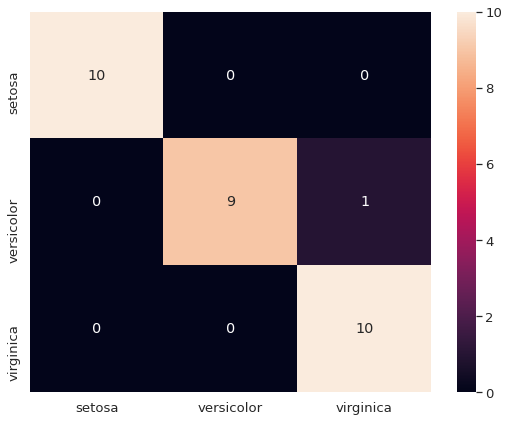

In [19]:
import seaborn as sns

sns.set(font_scale=1.2)
plt.figure(figsize=(9,7))
sns.heatmap(cmat,annot=True,xticklabels=data.target_names,yticklabels=data.target_names)